In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Исходная функция на отрезке [-5, 5]: <br/>
$f(x) = x \cdot cos(sin(x))$

In [2]:
f = lambda x: x*np.cos(np.sin(x))

In [3]:
def mse(ys1, ys2):
    return np.mean([(ys1[i]-ys2[i])**2 for i in range(len(ys1))])

## 1. Алгебраическая интерполяция в форме Лагранжа 

In [4]:
def lagrange(x0s, xs, ys):
    Ls = []
    for x0 in x0s:
        ls = [np.prod([(x0-x_j)/(x_i-x_j) for x_j in xs if x_j!=x_i]) for x_i in xs]
        L = np.sum([l*y for l, y in zip(ls, ys)])
        Ls.append(L)
    return Ls

In [5]:
n_xs = np.linspace(-5, 5, 1001)
n_ys = [f(x) for x in n_xs]

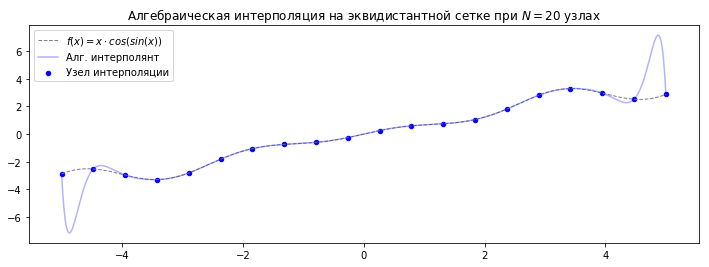

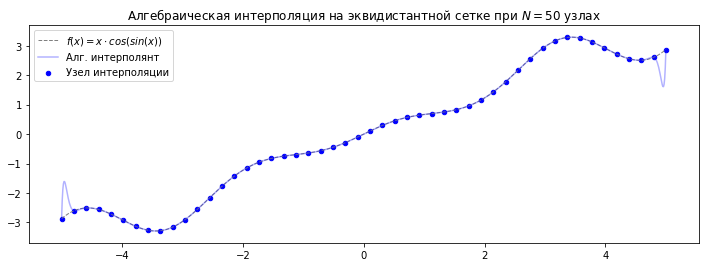

In [23]:
N = 20
xs = np.linspace(-5, 5, N)
ys = [f(x) for x in xs]
plt.figure(figsize=(12,4))
plt.title('Алгебраическая интерполяция на эквидистантной сетке при $N=20$ узлах')
plt.plot(n_xs, n_ys, '--', color='gray', lw=1, label='$f(x)=x \cdot cos(sin(x))$');
plt.scatter(xs, ys, color='b', s=20, label='Узел интерполяции');
plt.plot(n_xs, lagrange(n_xs, xs, ys), color='b', alpha=.3, label='Алг. интерполянт');
plt.legend();
plt.show();

N = 50
xs = np.linspace(-5, 5, N)
ys = [f(x) for x in xs]
plt.figure(figsize=(12,4))
plt.title('Алгебраическая интерполяция на эквидистантной сетке при $N=50$ узлах')
plt.plot(n_xs, n_ys, '--', color='gray', lw=1, label='$f(x)=x \cdot cos(sin(x))$');
plt.scatter(xs, ys, color='b', s=20, label='Узел интерполяции');
plt.plot(n_xs, lagrange(n_xs, xs, ys), color='b', alpha=.3, label='Алг. интерполянт');
plt.legend();
plt.show();

Таким образом, выбросы вблизи крайних узлов "сглаживаются" при росте числа узлов $N$.

Среднеквадратичная ошибка при $N=20$ узлах и эквидистантной сетке:

In [7]:
N = 20
xs = np.linspace(-5, 5, N)
ys = [f(x) for x in xs]
error = mse(lagrange(n_xs, xs, ys), n_ys)
print('MSE = %0.5f' %error)

MSE = 0.83557


### 1.1 Оптимальная сетка

Согласно теореме оптимальная сетка состоит из корней полинома Чебышева на отрезке интерполяции.

$x_{k}=5 \cdot \cos \left({\frac {2k-1}{2n}}\pi \right),\quad k=1,\ldots ,n$ на [-5, 5] - корни многочлена Чебышева.

In [19]:
N = 20
xs = [5*np.cos(np.pi*(2*k+1)/(2*N)) for k in range(N)]
ys = [f(x) for x in xs]

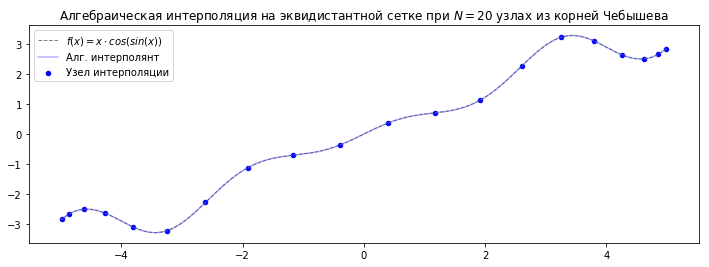

In [20]:
plt.figure(figsize=(12,4))
plt.title('Алгебраическая интерполяция на эквидистантной сетке при $N=20$ узлах из корней Чебышева')
plt.plot(n_xs, n_ys, '--', color='gray', lw=1, label='$f(x)=x \cdot cos(sin(x))$');
plt.scatter(xs, ys, color='b', s=20, label='Узел интерполяции');
plt.plot(n_xs, lagrange(n_xs, xs, ys), color='b', alpha=.3, label='Алг. интерполянт');
plt.legend();
plt.show();

In [117]:
N = 20
xs = [5*np.cos(np.pi*(2*k+1)/(2*N)) for k in range(N)]
ys = [f(x) for x in xs]
error = mse(lagrange(n_xs, xs, ys), n_ys)
print('MSE = %0.5f' %error)

MSE = 0.00001


Действительно, $MSE$ улучшилась на 4 порядка.  

### 1.2 Зависимость ошибки интерполяции от числа узлов

Рассмотрим увеличение числа узлов при их соответствии корням полинома Чебышева

In [108]:
Ns = range(5, 105, 10)
n_xs = np.linspace(-5, 5, 1001)
n_ys = [f(x) for x in n_xs]
data = []
for N in Ns:
    xs = [5*np.cos(np.pi*(2*k+1)/(2*N)) for k in range(N)]
    ys = [f(x) for x in xs]
    alg = lagrange(n_xs, xs, ys)
    alg_error = mse(alg, n_ys)
    data.append([N, alg_error])

In [109]:
df = pd.DataFrame(columns=['N', 'MSE'], data=data)
df.set_index('N', inplace=True)
df.transpose()

N,5,15,25,35,45,55,65,75,85,95
MSE,0.279912,0.000025,8.486136e-08,1.026252e-11,2.991764e-16,4.281649e-21,4.048962e-26,2.646028e-30,3.475061e-30,4.013652e-30


Равномерно убывает с ростом числа узлов.

Теперь рассмотрим эквидистантную сетку. 

In [110]:
Ns = range(5, 105, 10)
n_xs = np.linspace(-5, 5, 1001)
n_ys = [f(x) for x in n_xs]
data = []
for N in Ns:
    xs = np.linspace(-5, 5, N).tolist()
    ys = [f(x) for x in xs]
    alg = lagrange(n_xs, xs, ys)
    alg_error = mse(alg, n_ys)
    data.append([N, alg_error])

In [111]:
df = pd.DataFrame(columns=['N', 'MSE'], data=data)
df.set_index('N', inplace=True)
df.transpose()

N,5,15,25,35,45,55,65,75,85,95
MSE,0.151586,0.001142,0.097886,0.079297,0.020084,0.002355,0.080663,17829.698664,2.078442e+10,9.911026e+15


In [162]:
Ns = range(5, 69, 1)
n_xs = np.linspace(-5, 5, 1001)
n_ys = [f(x) for x in n_xs]
data = []
for N in Ns:
    xs = np.linspace(-5, 5, N).tolist()
    ys = [f(x) for x in xs]
    alg = lagrange(n_xs, xs, ys)
    alg_error = mse(alg, n_ys)
    data.append([N, alg_error])

Оценка на константу Лебега $L$ в случае эквидистантной сетки: $L_n>\frac{2^{n-3}}{(n-1.5)\sqrt{n-1}}$, $n\ge4$ <br/>
В данном типе данных ошибка округления $\approx 10^{-17}$. Чувствительность к заданию функции в узлах равна $10^{-17} \cdot L_n$.

In [163]:
L = lambda n: 2**(n-3)/(np.sqrt(n-1)*(n-1.5))

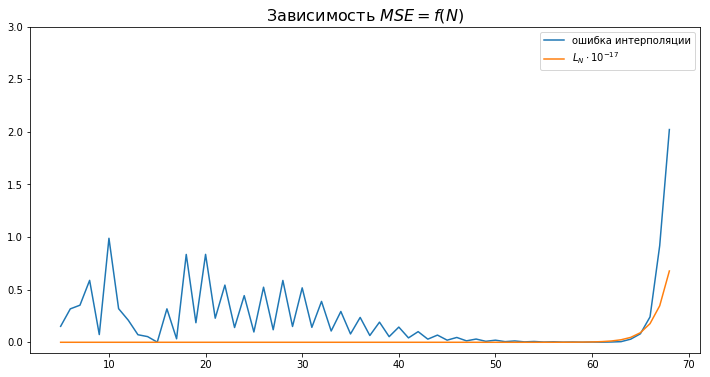

In [164]:
plt.figure(figsize=(12,6))
plt.title('Зависимость $MSE=f(N)$', fontsize=16)
plt.plot([x[0] for x in data], [x[1] for x in data], label='ошибка интерполяции');
plt.plot([x[0] for x in data], [L(x[0])*1e-17 for x in data], label='$L_N \cdot 10^{-17}$');
plt.ylim((-0.1, 3));
plt.legend();